# MODELO DE PREDICCIÓN PARA LA MORTALIDAD
**Variable objetivo:** mortalidad ó número de fallecimientos.

**Variables predictoras:** númeor de personas según sexo y franja de edad. Rangos de edad de 5 años, siendo el primero 0-4 años y el último >100 años.


## Startup

Mount the Google Drive to Google Colab:

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/'

Mounted at /content/drive


Import some libraries:


In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

Read data:

In [3]:
df_02 = pd.read_excel(path + "EXCEL_02.xlsx", converters = {'CODMUN' : str})
df_04 = pd.read_excel(path + "EXCEL_04.xlsx", converters = {'CODMUN' : str})

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [4]:
df_02.head()

,CODMUN,Provincia,Municipio,NAT2000,NAT2001,NAT2002,NAT2003,NAT2004,NAT2005,NAT2006,NAT2007,NAT2008,NAT2009,NAT2010,NAT2011,NAT2012,NAT2013,NAT2014,NAT2015,NAT2016,NAT2017,NAT2018,NAT2019,NAT2020,MOR2000,MOR2001,MOR2002,MOR2003,MOR2004,MOR2005,MOR2006,MOR2007,MOR2008,MOR2009,MOR2010,MOR2011,MOR2012,MOR2013,MOR2014,MOR2015,MOR2016,MOR2017,MOR2018,MOR2019,MOR2020,SVEG2000,SVEG2001,SVEG2002,SVEG2003,SVEG2004,SVEG2005,SVEG2006,SVEG2007,SVEG2008,SVEG2009,SVEG2010,SVEG2011,SVEG2012,SVEG2013,SVEG2014,SVEG2015,SVEG2016,SVEG2017,SVEG2018,SVEG2019,SVEG2020,TBNAT2000,TBNAT2001,TBNAT2002,TBNAT2003,TBNAT2004,TBNAT2005,TBNAT2006,TBNAT2007,TBNAT2008,TBNAT2009,TBNAT2010,TBNAT2011,TBNAT2012,TBNAT2013,TBNAT2014,TBNAT2015,TBNAT2016,TBNAT2017,TBNAT2018,TBNAT2019,TBNAT2020,POB2020,POB2019,POB2018,POB2017,POB2016,POB2015,POB2014,POB2013,POB2012,POB2011,POB2010,POB2009,POB2008,POB2007,POB2006,POB2005,POB2004,POB2003,POB2002,POB2001,POB2000,TBMOR2000,TBMOR2001,TBMOR2002,TBMOR2003,TBMOR2004,TBMOR2005,TBMOR2006,TBMOR2007,TBMOR2008,TBMOR2009,TBMOR2010,TBMOR2011,TBMOR2012,TBMOR2013,TBMOR2014,TBMOR2015,TBMOR2016,TBMOR2017,TBMOR2018,TBMOR2019,TBMOR2020,TCVEG2000,TCVEG2001,TCVEG2002,TCVEG2003,TCVEG2004,TCVEG2005,TCVEG2006,TCVEG2007,TCVEG2008,TCVEG2009,TCVEG2010,TCVEG2011,TCVEG2012,TCVEG2013,TCVEG2014,TCVEG2015,TCVEG2016,TCVEG2017,TCVEG2018,TCVEG2019,TCVEG2020
0,01001,Alava,Alegría-Dulantzi,29.0,25.0,27.0,34.0,34.0,47.0,38,52,62,33,47,37,34,34,42,30,29,22,17,25,17,10.0,9.0,4.0,14.0,9.0,15.0,5,10,10,13,3,14,14,13,23,18,13,14,15,12,11,19,16,23,20,25,32,33,42,52,20,44,23,20,21,19,12,16,8,2,13,6,11.595362,10.187449,11.373210,14.808362,15.037594,21.095153,17.423200,23.974182,29.439696,15.957447,23.141310,18.463074,17.534812,17.979905,22.604952,16.429354,16.647532,12.629162,10.017678,15.169903,17.956656,1615,1648,1697,1742,1766,1826,1858,1891,1939,2004,2031,2068,2106,2169,2181.0,2228.0,2261.0,2296.0,2374.0,2454.0,2501.0,3.998401,3.667482,1.684920,6.097561,3.980540,6.732496,2.292526,4.610420,4.748338,6.286267,1.477105,6.986028,7.220217,6.874669,12.378902,9.857612,7.361268,8.036739,8.839128,7.281553,6.811146,7.596961,6.519967,9.688290,8.710801,11.057054,14.362657,15.130674,19.363762,24.691358,9.671180,21.664205,11.477046,10.314595,11.105235,10.226050,6.571742,9.060023,4.592423,1.178550,7.888350,3.715170
1,01002,Alava,Amurrio,72.0,66.0,54.0,68.0,67.0,61.0,81,95,87,85,93,104,105,109,99,121,112,104,87,74,85,65.0,73.0,68.0,74.0,79.0,83.0,78,83,87,84,79,88,100,85,75,93,101,106,97,95,98,7,-7,-14,-6,-12,-22,3,12,0,1,14,16,5,24,24,28,11,-2,-10,-21,-13,4.675932,4.370861,3.652103,4.733398,4.773440,4.451905,6.035318,7.200788,6.707787,6.658311,7.391512,8.438819,8.651945,9.155048,8.412644,10.471657,10.156888,9.431396,8.049593,6.972581,6.914434,10413,10613,10808,11027,11286,11555,11768,11906,12136,12324,12582,12766,12970,13193,13421.0,13702.0,14036.0,14366.0,14786.0,15100.0,15398.0,4.221327,4.834437,4.598945,5.151051,5.628384,6.057510,5.811787,6.291215,6.707787,6.579978,6.278811,7.140539,8.239947,7.139258,6.373215,8.048464,8.949141,9.612769,8.974833,8.951286,9.411313,0.454604,-0.463576,-0.946842,-0.417653,-0.854944,-1.605605,0.223530,0.909573,0.000000,0.078333,1.112701,1.298280,0.411997,2.015790,2.039429,2.423193,0.974659,-0.181373,-0.925241,-1.978705,-1.248439
2,01003,Alava,Aramaio,15.0,18.0,15.0,17.0,19.0,17.0,19,10,15,15,14,13,12,12,20,11,8,16,9,11,5,9.0,6.0,12.0,16.0,7.0,12.0,11,14,16,18,12,10,17,12,9,13,11,12,21,16,18,6,12,3,1,12,5,8,-4,-1,-3,2,3,-5,0,11,-2,-3,4,-12,-5,-13,16.574586,20.385051,16.872891,19.252548,21.664766,19.585253,22.352941,11.806375,17.921147,18.404908,17.391304,16.169154,14.943960,15.544041,26.385224,15.130674,11.444921,22.889843,13.333333,16.641452,23.885350,628,661,675,699,712,727,758,772,803,804,805,815,837,847,850.0,868.0,877.0,883.0,889.0,883.0,905.0,9.944751,6.795017,13.498313,18.120045,7.981756,13.824885,12.941176,16.528926,19.115890,22.085890,14.906832,12.437811,21.170610,15.544041,11.873351,17.881706,15.449438,17.167382,31.111111,24.205749,28.662

In [5]:
df_04.head()

,OBJECTID,NATCODE,CODMUN,NOMBRE,PROVINCIA,CCAA,0A4_21,0A4_10,0A4_03,5A9_21,5A9_10,5A9_03,10A14_21,10A14_10,10A14_03,15A19_21,15A19_10,15A19_03,20A24_21,20A24_10,20A24_03,25A29_21,25A29_10,25A29_03,30A34_21,30A34_10,30A34_03,35A39_21,35A39_10,35A39_03,40A44_21,40A44_10,40A44_03,45A49_21,45A49_10,45A49_03,50A54_21,50A54_10,50A54_03,55A59_21,55A59_10,55A59_03,60A64_21,60A64_10,60A64_03,65A69_21,65A69_10,65A69_03,70A74_21,70A74_10,70A74_03,75A79_21,75A79_10,75A79_03,80A84_21,80A84_10,80A84_03,85A89_21,85A89_10,85A89_03,90A94_21,90A94_10,90A94_03,95A99_21,95A99_10,95A99_03,100YMS_21,100YMS_10,100YMS_03,H0A4_21,H0A4_10,H0A4_03,H5A9_21,H5A9_10,H5A9_03,H10A14_21,H10A14_10,H10A14_03,H15A19_21,H15A19_10,H15A19_03,H20A24_21,H20A24_10,H20A24_03,H25A29_21,H25A29_10,H25A29_03,H30A34_21,H30A34_10,H30A34_03,H35A39_21,H35A39_10,H35A39_03,H40A44_21,H40A44_10,H40A44_03,H45A49_21,H45A49_10,H45A49_03,H50A54_21,H50A54_10,H50A54_03,H55A59_21,H55A59_10,H55A59_03,H60A64_21,H60A64_10,H60A64_03,H65A69_21,H65A69_10,H65A69_03,H70A74_21,H70A74_10,H70A74_03,H75A79_21,H75A79_10,H75A79_03,H80A84_21,H80A84_10,H80A84_03,H85A89_21,H85A89_10,H85A89_03,H90A94_21,H90A94_10,H90A94_03,H95A99_21,H95A99_10,H95A99_03,H100MS_21,H100MS_10,H100MS_03,M0A4_21,M0A4_10,M0A4_03,M5A9_21,M5A9_10,M5A9_03,M10A14_21,M10A14_10,M10A14_03,M15A19_21,M15A19_10,M15A19_03,M20A24_21,M20A24_10,M20A24_03,M25A29_21,M25A29_10,M25A29_03,M30A34_21,M30A34_10,M30A34_03,M35A39_21,M35A39_10,M35A39_03,M40A44_21,M40A44_10,M40A44_03,M45A49_21,M45A49_10,M45A49_03,M50A54_21,M50A54_10,M50A54_03,M55A59_21,M55A59_10,M55A59_03,M60A64_21,M60A64_10,M60A64_03,M65A69_21,M65A69_10,M65A69_03,M70A74_21,M70A74_10,M70A74_03,M75A79_21,M75A79_10,M75A79_03,M80A84_21,M80A84_10,M80A84_03,M85A89_21,M85A89_10,M85A89_03,M90A94_21,M90A94_10,M90A94_03,M95A99_21,M95A99_10,M95A99_03,M100YMS_21,M100YMS_10,M100YMS_03,POBJOV03,TJUVEN03,TJUVEN10,TJUVEN21,MPVIE03,MPJOV03,MPVIE10,MPJOV10,MPVIE21,MPJOV21,HPVIE03,HPJOV03,HPVIE10,HPJOV10,HPVIE21,HPJOV21,PJOV10,PJOV21,PVIEJ03,PVIEJ10,PVIEJ21,TENVEJ03,TENVEJ10,TENVEJ21,RMASCU03,RMASCU10,RMASCU21,PADUL03,PADUL10,PADUL21,PRPAD03,PRPAD10,PRPAD21,DEPEND03,DEPEND10,DEPEND21,IDV2003,IDV2010,IDV2021,IENVEJ03,IENVEJ10,IENVEJ21,PSOP03,PRPSO03,PRPSO10,PSOP10,PRPSO21,PSOP21,IREEMP03,IREEMP10,IREEMP21,PRMEF03,MEFEC03,HIJMUJ03,PRMEF10,MEFEC10,HIJMUJ10,PRMEF21,MEFEC21,HIJMUJ21,CARMAT03,CARMAT10,CARMAT21,POB2021,POB2010,POB2003,HOM2021,HOM2010,HOM2003,MUJ2021,MUJ2010,MUJ2003
0,1,34033333001,33001,Allande,Asturias,Principado de Asturias,32.0,35.0,45.0,33.0,36.0,56.0,34.0,49.0,88.0,34.0,81.0,127.0,60.0,96.0,136.0,59.0,115.0,124.0,69.0,97.0,144.0,82.0,121.0,128.0,81.0,132.0,155.0,98.0,143.0,130.0,124.0,136.0,126.0,141.0,128.0,161.0,141.0,146.0,139.0,118.0,132.0,186.0,131.0,164.0,199.0,122.0,169.0,159.0,99.0,135.0,98.0,105.0,86.0,65.0,40.0,27.0,27.0,15.0,3.0,3.0,2.0,0.0,0.0,14.0,18.0,26.0,14.0,19.0,27.0,16.0,25.0,48.0,18.0,44.0,69.0,32.0,56.0,64.0,29.0,58.0,68.0,42.0,55.0,82.0,40.0,53.0,73.0,42.0,77.0,100.0,51.0,87.0,71.0,64.0,86.0,60.0,72.0,61.0,88.0,87.0,71.0,65.0,59.0,67.0,95.0,59.0,73.0,96.0,67.0,87.0,75.0,39.0,54.0,37.0,43.0,35.0,32.0,10.0,8.0,14.0,2.0,1.0,1.0,0.0,0.0,0.0,18.0,17.0,19.0,19.0,17.0,29.0,18.0,24.0,40.0,16.0,37.0,58.0,28.0,40.0,72.0,30.0,57.0,56.0,27.0,42.0,62.0,42.0,68.0,55.0,39.0,55.0,55.0,47.0,56.0,59.0,60.0,50.0,66.0,69.0,67.0,73.0,54.0,75.0,74.0,59.0,65.0,91.0,72.0,91.0,103.0,55.0,82.0,84.0,60.0,81.0,61.0,62.0,51.0,33.0,30.0,19.0,13.0,13.0,2.0,2.0,2.0,0.0,0.0,189,8.231707,5.908419,6.111111,387,88,391,58,353,55,350,101,391,62,353,44,120,99,737,716,632,32.099303,35.253570,39.012346,107.782805,103.915663,97.560976,1370,1195,889,59.668990,58.838011,54.876543,242.795620,179.916318,170.091114,53.795620,59.916318,71.091114,389.947090,596.666667,638.383838,130,5.662021,24.273757,493,20.370370,330,109.448819,180.246914,414.705882,41.266968,456,9.868421,64.457831,642,5.451713,24.756098,203,15.763547,4.166667,2.647975,8.866995,1620,2031,2296.0,800,1035,1191.0,820,996,1105.0
1,2,34033333002,33002,A

Select target variables (MOR2003, MOR2010) and comunn CODMUN for future merge:

In [6]:
my_02_cols = ["MOR2003", "MOR2010"]
my_02_cols.append("CODMUN")
my_02_cols

['MOR2003', 'MOR2010', 'CODMUN']

Select predictors and column CODMUN ofr future merge:

In [7]:
my_04_cols = list(filter(lambda x: (x[-3:] == "_03" or x[-3:] == "_10") and
                                   (x[0] == "M" or x[0] == "H"), df_04.columns))
my_04_cols.append("CODMUN")
my_04_cols

['H0A4_10',
 'H0A4_03',
 'H5A9_10',
 'H5A9_03',
 'H10A14_10',
 'H10A14_03',
 'H15A19_10',
 'H15A19_03',
 'H20A24_10',
 'H20A24_03',
 'H25A29_10',
 'H25A29_03',
 'H30A34_10',
 'H30A34_03',
 'H35A39_10',
 'H35A39_03',
 'H40A44_10',
 'H40A44_03',
 'H45A49_10',
 'H45A49_03',
 'H50A54_10',
 'H50A54_03',
 'H55A59_10',
 'H55A59_03',
 'H60A64_10',
 'H60A64_03',
 'H65A69_10',
 'H65A69_03',
 'H70A74_10',
 'H70A74_03',
 'H75A79_10',
 'H75A79_03',
 'H80A84_10',
 'H80A84_03',
 'H85A89_10',
 'H85A89_03',
 'H90A94_10',
 'H90A94_03',
 'H95A99_10',
 'H95A99_03',
 'H100MS_10',
 'H100MS_03',
 'M0A4_10',
 'M0A4_03',
 'M5A9_10',
 'M5A9_03',
 'M10A14_10',
 'M10A14_03',
 'M15A19_10',
 'M15A19_03',
 'M20A24_10',
 'M20A24_03',
 'M25A29_10',
 'M25A29_03',
 'M30A34_10',
 'M30A34_03',
 'M35A39_10',
 'M35A39_03',
 'M40A44_10',
 'M40A44_03',
 'M45A49_10',
 'M45A49_03',
 'M50A54_10',
 'M50A54_03',
 'M55A59_10',
 'M55A59_03',
 'M60A64_10',
 'M60A64_03',
 'M65A69_10',
 'M65A69_03',
 'M70A74_10',
 'M70A74_03',
 'M75A79

Check shapes:

In [8]:
df_02.shape

(3856, 150)

In [9]:
df_04.shape

(3931, 267)

Have a look at the population centres that are not in both datasets:



In [10]:
temp1 = list(df_04["CODMUN"].values)
temp2 = list(df_02["CODMUN"].values)
print(len([elem for elem in temp1 if elem not in temp2]))
print(len([elem for elem in temp2 if elem not in temp1]))

75
0


Perform outer join in order to return all those records wich either have a match in the left or right dataframe:

In [11]:
df_join = pd.merge(df_02[my_02_cols], df_04[my_04_cols], 
             on = "CODMUN",
             how = "outer")

In [12]:
df_join.shape

(3931, 87)

Remove rows with missing values

In [13]:
df_join.isnull().any(axis=1).sum()

77

In [14]:
df_join = df_join.dropna()

In [15]:
df_join.shape

(3854, 87)

We do not need CODMUN anymore so drop it:

In [16]:
df_join = df_join.drop(["CODMUN"], axis = 1) 

In [17]:
df_join.head()

,MOR2003,MOR2010,H0A4_10,H0A4_03,H5A9_10,H5A9_03,H10A14_10,H10A14_03,H15A19_10,H15A19_03,H20A24_10,H20A24_03,H25A29_10,H25A29_03,H30A34_10,H30A34_03,H35A39_10,H35A39_03,H40A44_10,H40A44_03,H45A49_10,H45A49_03,H50A54_10,H50A54_03,H55A59_10,H55A59_03,H60A64_10,H60A64_03,H65A69_10,H65A69_03,H70A74_10,H70A74_03,H75A79_10,H75A79_03,H80A84_10,H80A84_03,H85A89_10,H85A89_03,H90A94_10,H90A94_03,H95A99_10,H95A99_03,H100MS_10,H100MS_03,M0A4_10,M0A4_03,M5A9_10,M5A9_03,M10A14_10,M10A14_03,M15A19_10,M15A19_03,M20A24_10,M20A24_03,M25A29_10,M25A29_03,M30A34_10,M30A34_03,M35A39_10,M35A39_03,M40A44_10,M40A44_03,M45A49_10,M45A49_03,M50A54_10,M50A54_03,M55A59_10,M55A59_03,M60A64_10,M60A64_03,M65A69_10,M65A69_03,M70A74_10,M70A74_03,M75A79_10,M75A79_03,M80A84_10,M80A84_03,M85A89_10,M85A89_03,M90A94_10,M90A94_03,M95A99_10,M95A99_03,M100YMS_10,M100YMS_03
0,14.0,3.0,118.0,64.0,104.0,32.0,53.0,41.0,48.0,36.0,46.0,52.0,80.0,96.0,172.0,124.0,204.0,98.0,148.0,69.0,119.0,57.0,73.0,53.0,71.0,44.0,37.0,36.0,49.0,28.0,31.0,24.0,22.0,14.0,14.0,7.0,5.0,5.0,1.0,5.0,0.0,0.0,0.0,0.0,129.0,61.0,96.0,42.0,65.0,40.0,46.0,35.0,55.0,46.0,70.0,80.0,152.0,99.0,182.0,101.0,149.0,62.0,103.0,50.0,58.0,40.0,53.0,41.0,41.0,27.0,41.0,26.0,19.0,15.0,27.0,16.0,12.0,24.0,13.0,6.0,7.0,6.0,0.0,5.0,1.0,0.0
1,74.0,79.0,236.0,155.0,192.0,175.0,205.0,231.0,221.0,276.0,294.0,420.0,379.0,370.0,444.0,321.0,346.0,380.0,409.0,412.0,418.0,359.0,400.0,427.0,395.0,318.0,328.0,203.0,245.0,211.0,166.0,207.0,183.0,143.0,120.0,86.0,47.0,36.0,17.0,11.0,2.0,2.0,0.0,0.0,195.0,176.0,193.0,173.0,195.0,217.0,200.0,291.0,289.0,331.0,344.0,365.0,368.0,344.0,371.0,387.0,381.0,422.0,426.0,400.0,417.0,338.0,357.0,277.0,290.0,204.0,211.0,250.0,215.0,216.0,221.0,185.0,178.0,136.0,108.0,67.0,36.0,25.0,8.0,6.0,0.0,2.0
2,16.0,12.0,43.0,39.0,42.0,36.0,41.0,39.0,29.0,38.0,35.0,41.0,35.0,47.0,48.0,59.0,65.0,73.0,60.0,76.0,72.0,68.0,70.0,45.0,57.0,48.0,48.0,38.0,32.0,53.0,45.0,39.0,29.0,19.0,26.0,14.0,7.0,15.0,5.0,2.0,1.0,0.0,0.0,0.0,37.0,33.0,41.0,28.0,32.0,31.0,26.0,38.0,36.0,42.0,37.0,48.0,53.0,60.0,46.0,56.0,51.0,70.0,74.0,50.0,58.0,37.0,39.0,40.0,42.0,32.0,31.0,35.0,27.0,32.0,29.0,26.0,24.0,24.0,12.0,10.0,9.0,7.0,3.0,1.0,0.0,0.0
3,14.0,14.0,53.0,25.0,55.0,32.0,44.0,36.0,39.0,38.0,40.0,45.0,57.0,54.0,110.0,56.0,82.0,63.0,72.0,60.0,72.0,60.0,60.0,44.0,67.0,40.0,48.0,25.0,29.0,30.0,26.0,30.0,23.0,14.0,17.0,21.0,13.0,2.0,1.0,4.0,0.0,0.0,1.0,0.0,43.0,35.0,43.0,23.0,31.0,34.0,32.0,41.0,49.0,44.0,68.0,55.0,106.0,55.0,70.0,63.0,82.0,64.0,76.0,66.0,65.0,39.0,47.0,29.0,39.0,24.0,31.0,26.0,18.0,40.0,42.0,27.0,25.0,22.0,27.0,11.0,10.0,4.0,4.0,0.0,1.0,0.0
4,2.0,2.0,9.0,4.0,3.0,4.0,2.0,1.0,4.0,2.0,3.0,1.0,2.0,6.0,10.0,11.0,19.0,8.0,9.0,10.0,16.0,5.0,6.0,6.0,3.0,2.0,6.0,5.0,5.0,8.0,7.0,6.0,6.0,4.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,2.0,7.0,2.0,2.0,2.0,2.0,3.0,4.0,6.0,6.0,7.0,8.0,9.0,16.0,7.0,14.0,8.0,4.0,3.0,9.0,7.0,8.0,5.0,1.0,3.0,8.0,3.0,3.0,8.0,7.0,4.0,2.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Select columns ofr years 2003 and 2010:

In [18]:
df_join_03_cols = [elem for elem in df_join.columns if elem[-2:] == "03"]
df_join_10_cols = [elem for elem in df_join.columns if elem[-2:] == "10"]

In [19]:
df_join_03 = df_join[df_join_03_cols]
df_join_03.head()

,MOR2003,H0A4_03,H5A9_03,H10A14_03,H15A19_03,H20A24_03,H25A29_03,H30A34_03,H35A39_03,H40A44_03,H45A49_03,H50A54_03,H55A59_03,H60A64_03,H65A69_03,H70A74_03,H75A79_03,H80A84_03,H85A89_03,H90A94_03,H95A99_03,H100MS_03,M0A4_03,M5A9_03,M10A14_03,M15A19_03,M20A24_03,M25A29_03,M30A34_03,M35A39_03,M40A44_03,M45A49_03,M50A54_03,M55A59_03,M60A64_03,M65A69_03,M70A74_03,M75A79_03,M80A84_03,M85A89_03,M90A94_03,M95A99_03,M100YMS_03
0,14.0,64.0,32.0,41.0,36.0,52.0,96.0,124.0,98.0,69.0,57.0,53.0,44.0,36.0,28.0,24.0,14.0,7.0,5.0,5.0,0.0,0.0,61.0,42.0,40.0,35.0,46.0,80.0,99.0,101.0,62.0,50.0,40.0,41.0,27.0,26.0,15.0,16.0,24.0,6.0,6.0,5.0,0.0
1,74.0,155.0,175.0,231.0,276.0,420.0,370.0,321.0,380.0,412.0,359.0,427.0,318.0,203.0,211.0,207.0,143.0,86.0,36.0,11.0,2.0,0.0,176.0,173.0,217.0,291.0,331.0,365.0,344.0,387.0,422.0,400.0,338.0,277.0,204.0,250.0,216.0,185.0,136.0,67.0,25.0,6.0,2.0
2,16.0,39.0,36.0,39.0,38.0,41.0,47.0,59.0,73.0,76.0,68.0,45.0,48.0,38.0,53.0,39.0,19.0,14.0,15.0,2.0,0.0,0.0,33.0,28.0,31.0,38.0,42.0,48.0,60.0,56.0,70.0,50.0,37.0,40.0,32.0,35.0,32.0,26.0,24.0,10.0,7.0,1.0,0.0
3,14.0,25.0,32.0,36.0,38.0,45.0,54.0,56.0,63.0,60.0,60.0,44.0,40.0,25.0,30.0,30.0,14.0,21.0,2.0,4.0,0.0,0.0,35.0,23.0,34.0,41.0,44.0,55.0,55.0,63.0,64.0,66.0,39.0,29.0,24.0,26.0,40.0,27.0,22.0,11.0,4.0,0.0,0.0
4,2.0,4.0,4.0,1.0,2.0,1.0,6.0,11.0,8.0,10.0,5.0,6.0,2.0,5.0,8.0,6.0,4.0,2.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,3.0,6.0,7.0,9.0,7.0,8.0,3.0,7.0,5.0,3.0,3.0,8.0,4.0,4.0,0.0,0.0,0.0,0.0


Rename columns for year 2003:

In [20]:
df_join_03_cols = [elem[:-3] for elem in df_join_03.columns]
df_join_03.columns = df_join_03_cols

In [21]:
df_join_03 = df_join_03.rename(columns = {"MOR2":"MOR"})

In [22]:
df_join_03.head()

,MOR,H0A4,H5A9,H10A14,H15A19,H20A24,H25A29,H30A34,H35A39,H40A44,H45A49,H50A54,H55A59,H60A64,H65A69,H70A74,H75A79,H80A84,H85A89,H90A94,H95A99,H100MS,M0A4,M5A9,M10A14,M15A19,M20A24,M25A29,M30A34,M35A39,M40A44,M45A49,M50A54,M55A59,M60A64,M65A69,M70A74,M75A79,M80A84,M85A89,M90A94,M95A99,M100YMS
0,14.0,64.0,32.0,41.0,36.0,52.0,96.0,124.0,98.0,69.0,57.0,53.0,44.0,36.0,28.0,24.0,14.0,7.0,5.0,5.0,0.0,0.0,61.0,42.0,40.0,35.0,46.0,80.0,99.0,101.0,62.0,50.0,40.0,41.0,27.0,26.0,15.0,16.0,24.0,6.0,6.0,5.0,0.0
1,74.0,155.0,175.0,231.0,276.0,420.0,370.0,321.0,380.0,412.0,359.0,427.0,318.0,203.0,211.0,207.0,143.0,86.0,36.0,11.0,2.0,0.0,176.0,173.0,217.0,291.0,331.0,365.0,344.0,387.0,422.0,400.0,338.0,277.0,204.0,250.0,216.0,185.0,136.0,67.0,25.0,6.0,2.0
2,16.0,39.0,36.0,39.0,38.0,41.0,47.0,59.0,73.0,76.0,68.0,45.0,48.0,38.0,53.0,39.0,19.0,14.0,15.0,2.0,0.0,0.0,33.0,28.0,31.0,38.0,42.0,48.0,60.0,56.0,70.0,50.0,37.0,40.0,32.0,35.0,32.0,26.0,24.0,10.0,7.0,1.0,0.0
3,14.0,25.0,32.0,36.0,38.0,45.0,54.0,56.0,63.0,60.0,60.0,44.0,40.0,25.0,30.0,30.0,14.0,21.0,2.0,4.0,0.0,0.0,35.0,23.0,34.0,41.0,44.0,55.0,55.0,63.0,64.0,66.0,39.0,29.0,24.0,26.0,40.0,27.0,22.0,11.0,4.0,0.0,0.0
4,2.0,4.0,4.0,1.0,2.0,1.0,6.0,11.0,8.0,10.0,5.0,6.0,2.0,5.0,8.0,6.0,4.0,2.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,3.0,6.0,7.0,9.0,7.0,8.0,3.0,7.0,5.0,3.0,3.0,8.0,4.0,4.0,0.0,0.0,0.0,0.0


In [23]:
df_join_03.shape

(3854, 43)

Subdataframe for year 2010:

In [24]:
df_join_10 = df_join[df_join_10_cols]

Rename columns:

In [25]:
df_join_10_cols = [elem[:-3] for elem in df_join_10.columns]
df_join_10.columns = df_join_10_cols

In [26]:
df_join_10 = df_join_10.rename(columns = {"MOR2":"MOR"})

In [27]:
df_join_10.head()

,MOR,H0A4,H5A9,H10A14,H15A19,H20A24,H25A29,H30A34,H35A39,H40A44,H45A49,H50A54,H55A59,H60A64,H65A69,H70A74,H75A79,H80A84,H85A89,H90A94,H95A99,H100MS,M0A4,M5A9,M10A14,M15A19,M20A24,M25A29,M30A34,M35A39,M40A44,M45A49,M50A54,M55A59,M60A64,M65A69,M70A74,M75A79,M80A84,M85A89,M90A94,M95A99,M100YMS
0,3.0,118.0,104.0,53.0,48.0,46.0,80.0,172.0,204.0,148.0,119.0,73.0,71.0,37.0,49.0,31.0,22.0,14.0,5.0,1.0,0.0,0.0,129.0,96.0,65.0,46.0,55.0,70.0,152.0,182.0,149.0,103.0,58.0,53.0,41.0,41.0,19.0,27.0,12.0,13.0,7.0,0.0,1.0
1,79.0,236.0,192.0,205.0,221.0,294.0,379.0,444.0,346.0,409.0,418.0,400.0,395.0,328.0,245.0,166.0,183.0,120.0,47.0,17.0,2.0,0.0,195.0,193.0,195.0,200.0,289.0,344.0,368.0,371.0,381.0,426.0,417.0,357.0,290.0,211.0,215.0,221.0,178.0,108.0,36.0,8.0,0.0
2,12.0,43.0,42.0,41.0,29.0,35.0,35.0,48.0,65.0,60.0,72.0,70.0,57.0,48.0,32.0,45.0,29.0,26.0,7.0,5.0,1.0,0.0,37.0,41.0,32.0,26.0,36.0,37.0,53.0,46.0,51.0,74.0,58.0,39.0,42.0,31.0,27.0,29.0,24.0,12.0,9.0,3.0,0.0
3,14.0,53.0,55.0,44.0,39.0,40.0,57.0,110.0,82.0,72.0,72.0,60.0,67.0,48.0,29.0,26.0,23.0,17.0,13.0,1.0,0.0,1.0,43.0,43.0,31.0,32.0,49.0,68.0,106.0,70.0,82.0,76.0,65.0,47.0,39.0,31.0,18.0,42.0,25.0,27.0,10.0,4.0,1.0
4,2.0,9.0,3.0,2.0,4.0,3.0,2.0,10.0,19.0,9.0,16.0,6.0,3.0,6.0,5.0,7.0,6.0,0.0,2.0,0.0,0.0,0.0,9.0,7.0,2.0,2.0,4.0,6.0,8.0,16.0,14.0,4.0,9.0,8.0,1.0,8.0,3.0,7.0,2.0,3.0,0.0,0.0,0.0


Concat both dataframes:

In [28]:
df = pd.concat([df_join_03, df_join_10])
df.head()

,MOR,H0A4,H5A9,H10A14,H15A19,H20A24,H25A29,H30A34,H35A39,H40A44,H45A49,H50A54,H55A59,H60A64,H65A69,H70A74,H75A79,H80A84,H85A89,H90A94,H95A99,H100MS,M0A4,M5A9,M10A14,M15A19,M20A24,M25A29,M30A34,M35A39,M40A44,M45A49,M50A54,M55A59,M60A64,M65A69,M70A74,M75A79,M80A84,M85A89,M90A94,M95A99,M100YMS
0,14.0,64.0,32.0,41.0,36.0,52.0,96.0,124.0,98.0,69.0,57.0,53.0,44.0,36.0,28.0,24.0,14.0,7.0,5.0,5.0,0.0,0.0,61.0,42.0,40.0,35.0,46.0,80.0,99.0,101.0,62.0,50.0,40.0,41.0,27.0,26.0,15.0,16.0,24.0,6.0,6.0,5.0,0.0
1,74.0,155.0,175.0,231.0,276.0,420.0,370.0,321.0,380.0,412.0,359.0,427.0,318.0,203.0,211.0,207.0,143.0,86.0,36.0,11.0,2.0,0.0,176.0,173.0,217.0,291.0,331.0,365.0,344.0,387.0,422.0,400.0,338.0,277.0,204.0,250.0,216.0,185.0,136.0,67.0,25.0,6.0,2.0
2,16.0,39.0,36.0,39.0,38.0,41.0,47.0,59.0,73.0,76.0,68.0,45.0,48.0,38.0,53.0,39.0,19.0,14.0,15.0,2.0,0.0,0.0,33.0,28.0,31.0,38.0,42.0,48.0,60.0,56.0,70.0,50.0,37.0,40.0,32.0,35.0,32.0,26.0,24.0,10.0,7.0,1.0,0.0
3,14.0,25.0,32.0,36.0,38.0,45.0,54.0,56.0,63.0,60.0,60.0,44.0,40.0,25.0,30.0,30.0,14.0,21.0,2.0,4.0,0.0,0.0,35.0,23.0,34.0,41.0,44.0,55.0,55.0,63.0,64.0,66.0,39.0,29.0,24.0,26.0,40.0,27.0,22.0,11.0,4.0,0.0,0.0
4,2.0,4.0,4.0,1.0,2.0,1.0,6.0,11.0,8.0,10.0,5.0,6.0,2.0,5.0,8.0,6.0,4.0,2.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,3.0,6.0,7.0,9.0,7.0,8.0,3.0,7.0,5.0,3.0,3.0,8.0,4.0,4.0,0.0,0.0,0.0,0.0


Select target variable and predictors:

In [29]:
target = df["MOR"]
predictors = df[df.columns[1:]]

Train-test partition:

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, target,
                                                    test_size = 0.33,
                                                    random_state = 0)

In [31]:
print('Training data shape:\nX_train: %s\ny_train: %s\n' % (X_train.shape, y_train.shape))
print('Test data shape:\nX_test: %s\ny_test: %s' % (X_test.shape, y_test.shape))

Training data shape:
X_train: (5164, 42)
y_train: (5164,)

Test data shape:
X_test: (2544, 42)
y_test: (2544,)


## Linear regression

In [32]:
from sklearn.linear_model import LinearRegression
# Try standard regression methods: linear regression
lin_reg = LinearRegression()

In [33]:
# Fit training data
lin_reg.fit(X_train, y_train)

LinearRegression()

In [34]:
# Prediction
y_pred_lin_reg = lin_reg.predict(X_test)

Create functoin to evaluate models:

In [35]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error  as mse
from sklearn.metrics import r2_score            as r2

def evaluate(obs, pred, method):
  """
  Function to evaluate regression models
    
  Parameters
  ----------
  obs : array-like
      Target variable observed. Continuous variable..
  pred : array-like
      Predicted values for target variable. Continuous variable.
  method: string
      Model type
  
  Returns
  -------
  my_mae: float
      Mean absolute error regression loss.
  my_mse: float
      Mean squared error regression loss.
  my_r2: float
        R2 (coefficient of determination) regression score function.
  """

  # Round predicted values to the nearest integer
  pred_round = np.rint(pred)
  # If negative, convert to 0
  pred_noneg = [0 if x <= 0 else x for x in pred_round]
    
  # Compute mean absolute error
  my_mae = mae(obs, pred_noneg)
  print("MAE for %s: %f" % (method, my_mae))
    
  # Compute mean squared error
  my_mse = mse(obs, pred_noneg)
  print("MSE for %s: %f" % (method, my_mse))
    
  # Compute R2
  my_r2 = r2(obs, pred_noneg)
  print("R2  for %s: %f" % (method, my_r2))
    
  # Count the number of negative predicted values
  neg = len([x for x in pred if x < 0])
  print("Negative predictions:      %i" % neg)

  return([my_mae, my_mse, my_r2])

In [36]:
type(y_test)

pandas.core.series.Series

In [37]:
from matplotlib import pyplot as plt
def plotter(obs, pred, method):
  """
  Function to plot obseved vs predicted values for the target variable.
    
  Parameters
  ----------
  obs : array-like
      Target variable observed. Continuous variable..
  pred : array-like
      Predicted values for target variable. Continuous variable.
  method: string
      Model type
  
  Returns
  -------
  None
  """
  plt.rcParams["figure.figsize"] = [7.50, 3.50]
  plt.rcParams["figure.autolayout"] = True
  pred_round = np.rint(pred)
  pred_noneg = [0 if x <= 0 else x for x in pred_round]
  overlapping = 0.150
  plt.tick_params(
      axis='x',          
      which='both',
      bottom=False,    
      top=False,       
      labelbottom=False) 
  plt.ylabel("Nº deaths")
  plt.plot(obs.values, lw = 5, alpha = overlapping)
  plt.plot(pred_noneg, c  ="red")
  plt.title("MORTALITY MODEL. " + method.upper())
  plt.legend(["obs", "pred"], loc = "upper right")
  plt.show()


  temp = pd.DataFrame({"obs"  : list(obs),
                      "pred" : list(pred)})
  
  temp = temp[temp["obs"] <= 10]

  plt.tick_params(
      axis='x',          
      which='both',
      bottom=False,    
      top=False,       
      labelbottom=False) 
  plt.ylabel("Nº deaths")
  plt.scatter(np.linspace(1, len(temp["obs"]), len(temp["obs"]), endpoint=True), 
           temp["obs"],  alpha = overlapping, marker = "o")
  plt.scatter(np.linspace(1, len(temp["obs"]), len(temp["obs"]), endpoint=True),
          [0 if x <= 0 else x for x in temp["pred"]], c = "red", marker = "o")
  plt.title("MORTALITY MODEL (zoom). " + method.upper())
  plt.legend(["obs", "pred"], loc = "upper right")
  plt.ylim(-1, 15)
  plt.show()


Evaluate linear regression:

In [38]:
eval_lr = evaluate(y_test, y_pred_lin_reg, "linear regression")

MAE for linear regression: 3.420991
MSE for linear regression: 180.278695
R2  for linear regression: 0.995788
Negative predictions:      117


Plot results:

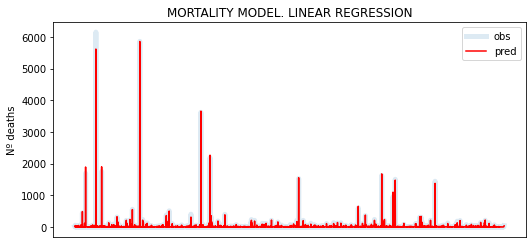

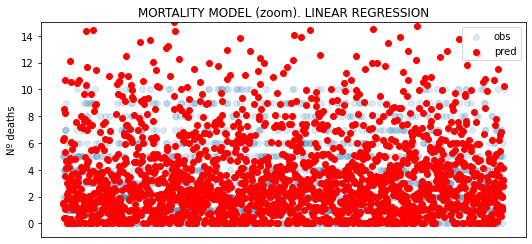

In [39]:
plotter(y_test, y_pred_lin_reg, "linear regression")

## KNN

GridSearchCV to find best number of neighbors:

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

grid_params = {"n_neighbors" : list(range(1,16))}

knn_cv = GridSearchCV(KNeighborsRegressor(), 
                       grid_params, 
                       verbose = 1,
                       cv = 3,
                       n_jobs = -1)

knn = knn_cv.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


In [41]:
knn.best_params_

{'n_neighbors': 1}

Build up model and predict:

In [42]:
knn = KNeighborsRegressor(n_neighbors = dict(knn.best_params_)['n_neighbors'])
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

Evaluate:

In [43]:
eval_knn = evaluate(y_test, y_pred_knn, "KNN")

MAE for KNN: 6.676887
MSE for KNN: 4874.084119
R2  for KNN: 0.886132
Negative predictions:      0


Plot:

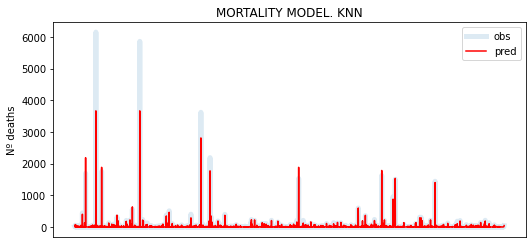

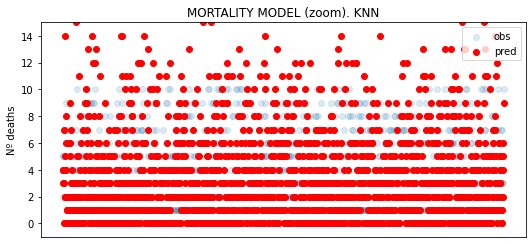

In [44]:
plotter(y_test, y_pred_knn, "KNN")

## Neural Network 1

Load needed libraries:

In [45]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
 

Callback for early stopping in order to avoid overfitting:

In [46]:
my_callbacks = [
                tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                 patience = 10,
                                                 min_delta = 0,
                                                 verbose = 1,
                                                 restore_best_weights = True)
]

Build up model:

In [47]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(units = 5, activation = 'relu', input_dim = 42))
model.add(Dense(units = 5, activation = 'relu'))
model.add(Dense(1, activation = "linear"))


model.compile(loss = 'mean_squared_error',
              metrics = ["mean_absolute_error"],
              optimizer = 'adam')

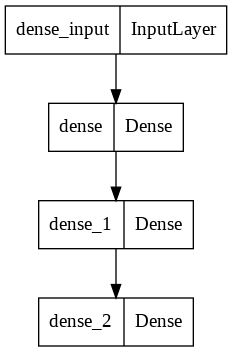

In [48]:
tf.keras.utils.plot_model(model)

Fit on training data:

In [49]:
hist_1 = model.fit(X_train, y_train,
            epochs = 50,
            validation_split = 0.2,
            verbose = 1,
            callbacks = my_callbacks)

Epoch 1/50
130/130 [==============================] - 4s 8ms/step - loss: 2869.4639 - mean_absolute_error: 10.5145 - val_loss: 820.9253 - val_mean_absolute_error: 7.1499
Epoch 2/50
130/130 [==============================] - 1s 4ms/step - loss: 648.9760 - mean_absolute_error: 7.1119 - val_loss: 674.5323 - val_mean_absolute_error: 6.5674
Epoch 3/50
130/130 [==============================] - 1s 4ms/step - loss: 984.4798 - mean_absolute_error: 6.9704 - val_loss: 662.6666 - val_mean_absolute_error: 6.4357
Epoch 4/50
130/130 [==============================] - 1s 5ms/step - loss: 1049.6512 - mean_absolute_error: 7.1179 - val_loss: 643.7182 - val_mean_absolute_error: 6.2674
Epoch 5/50
130/130 [==============================] - 1s 4ms/step - loss: 475.5381 - mean_absolute_error: 5.9559 - val_loss: 4541.3057 - val_mean_absolute_error: 11.5991
Epoch 6/50
130/130 [==============================] - 1s 5ms/step - loss: 511.6158 - mean_absolute_error: 6.5637 - val_loss: 561.7411 - val_mean_absolute_e

Plot curves:

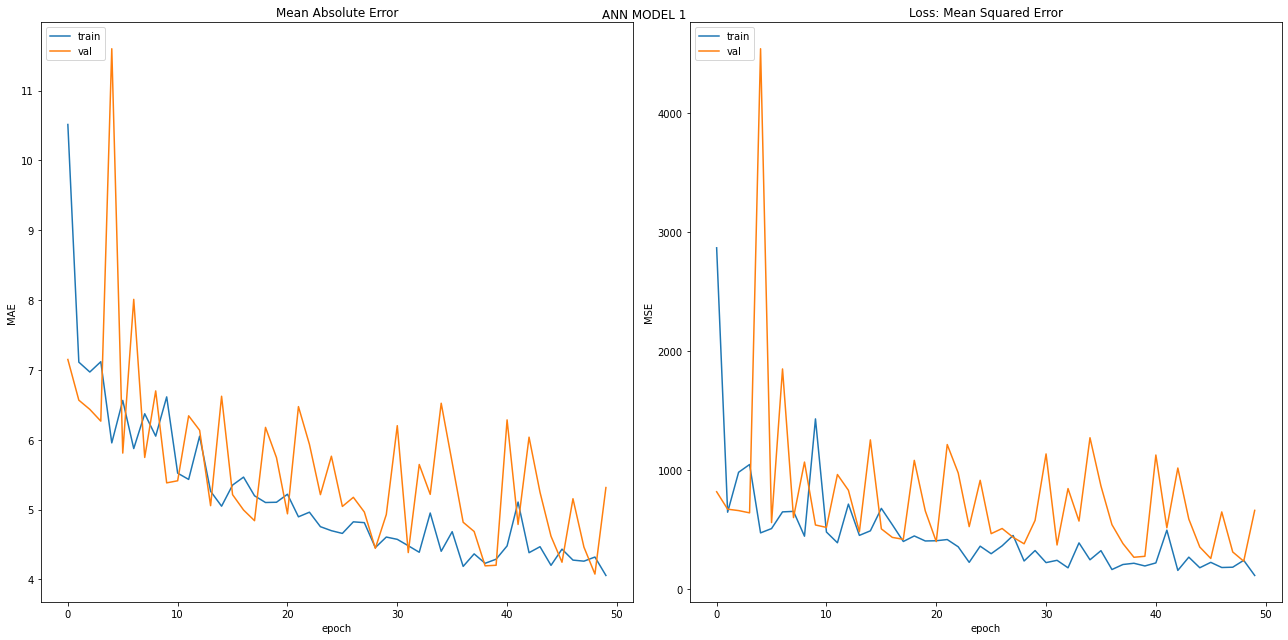

In [50]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,9))
  
fig.suptitle('ANN MODEL 1')

ax1.plot(hist_1.history['mean_absolute_error'])
ax1.plot(hist_1.history['val_mean_absolute_error'])
ax1.title.set_text('Mean Absolute Error')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')
#ax1.show()

ax2.plot(hist_1.history['loss'])
ax2.plot(hist_1.history['val_loss'])
ax2.title.set_text('Loss: Mean Squared Error')
ax2.set_ylabel('MSE')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')
#ax2.show()

Predict:

In [51]:
y_pred_ann = model.predict(X_test)

Evaluate:

In [52]:
eval_ann_1 = evaluate(y_test, y_pred_ann.flatten(), "ANN")

MAE for ANN: 4.615566
MSE for ANN: 464.684748
R2  for ANN: 0.989144
Negative predictions:      4


Plot observed vs predicted:

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


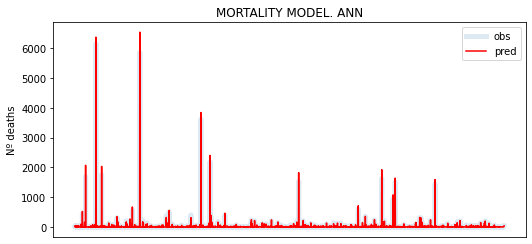

/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:2830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  order=order, subok=True, ndmin=ndmin)


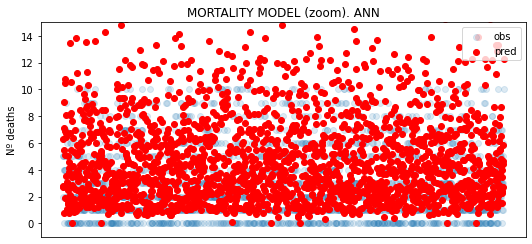

In [53]:
plotter(y_test, y_pred_ann, "ANN")

## Neural Network 2:

Build up model:

In [54]:
tf.keras.backend.clear_session()
model_2 = Sequential()
model_2.add(Dense(units = 32, activation = 'relu', input_dim = 42))
model_2.add(Dense(units = 16, activation = 'relu'))
model_2.add(Dense(units = 8, activation = 'relu'))
model_2.add(Dense(1, activation = "linear"))


model_2.compile(loss = 'mean_squared_error',
              metrics = ["mean_absolute_error"],
              optimizer = 'adam')

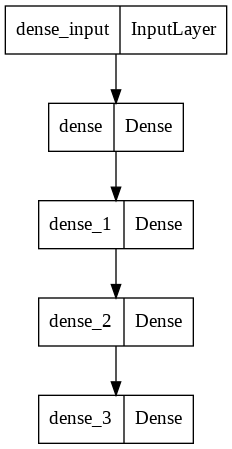

In [55]:
tf.keras.utils.plot_model(model_2)

Fit on training data:

In [56]:
hist_2 = model_2.fit(X_train, y_train,
            epochs = 50,
            validation_split = 0.2,
            verbose = 1,
            callbacks = my_callbacks)

Epoch 1/50
130/130 [==============================] - 1s 6ms/step - loss: 12963.4121 - mean_absolute_error: 16.9077 - val_loss: 444.5153 - val_mean_absolute_error: 4.8100
Epoch 2/50
130/130 [==============================] - 1s 5ms/step - loss: 414.6534 - mean_absolute_error: 4.5066 - val_loss: 1117.7357 - val_mean_absolute_error: 5.4640
Epoch 3/50
130/130 [==============================] - 1s 4ms/step - loss: 311.8071 - mean_absolute_error: 4.1788 - val_loss: 1281.1228 - val_mean_absolute_error: 5.7257
Epoch 4/50
130/130 [==============================] - 1s 5ms/step - loss: 240.3352 - mean_absolute_error: 4.0649 - val_loss: 455.9502 - val_mean_absolute_error: 4.5862
Epoch 5/50
130/130 [==============================] - 1s 5ms/step - loss: 185.7874 - mean_absolute_error: 3.8183 - val_loss: 2001.8478 - val_mean_absolute_error: 7.7210
Epoch 6/50
130/130 [==============================] - 1s 5ms/step - loss: 303.3210 - mean_absolute_error: 4.3762 - val_loss: 431.7075 - val_mean_absolute_

Plot curves:

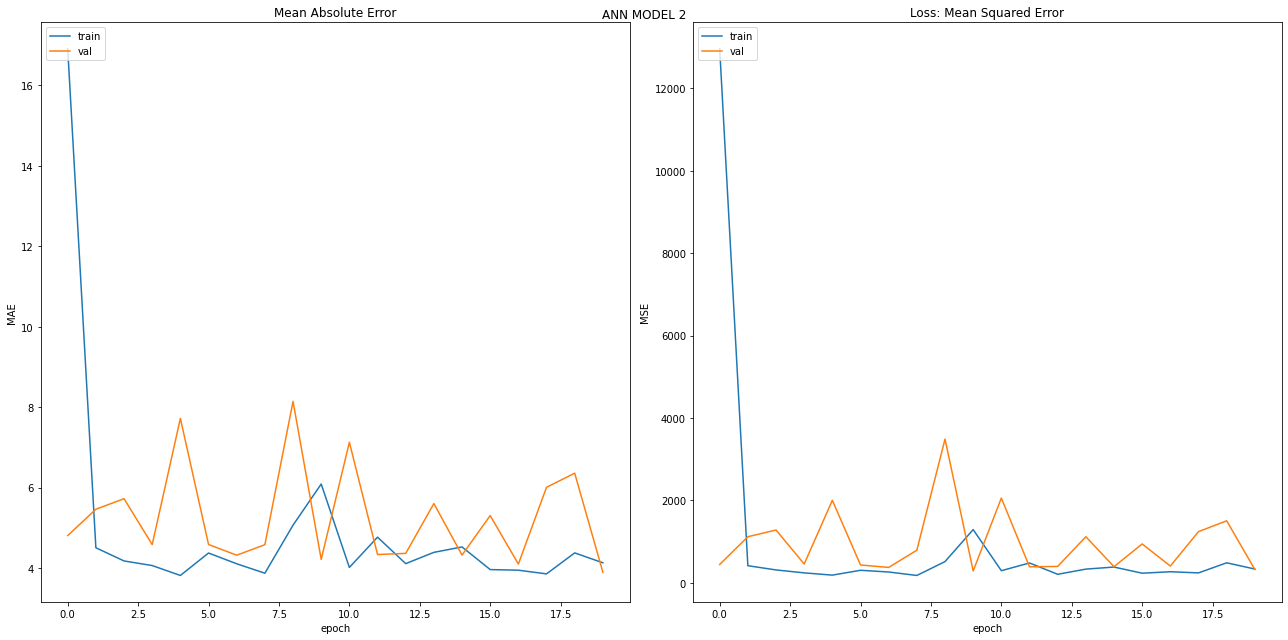

In [57]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,9))
  
fig.suptitle('ANN MODEL 2')

ax1.plot(hist_2.history['mean_absolute_error'])
ax1.plot(hist_2.history['val_mean_absolute_error'])
ax1.title.set_text('Mean Absolute Error')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')
#ax1.show()

ax2.plot(hist_2.history['loss'])
ax2.plot(hist_2.history['val_loss'])
ax2.title.set_text('Loss: Mean Squared Error')
ax2.set_ylabel('MSE')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')
#ax2.show()

Predict:

In [58]:
y_pred_ann_2 = model_2.predict(X_test)

Evaluate:

In [59]:
eval_ann_2 = evaluate(y_test, y_pred_ann_2.flatten(), "ANN_2")

MAE for ANN_2: 3.897799
MSE for ANN_2: 292.351415
R2  for ANN_2: 0.993170
Negative predictions:      15


Plot observed vs predicted:

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


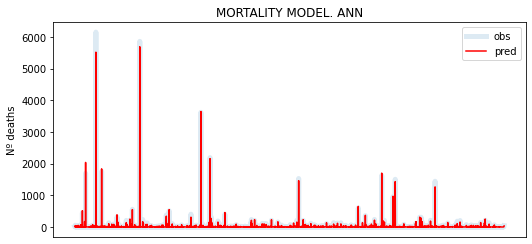

/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:2830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  order=order, subok=True, ndmin=ndmin)


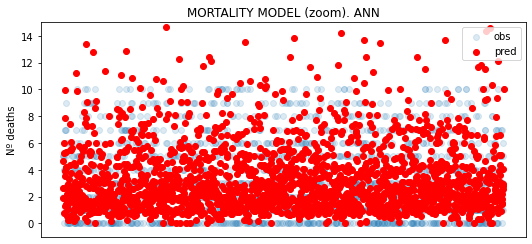

In [60]:
plotter(y_test, y_pred_ann_2, "ANN")

## Neural Network 3

Build up model:

In [61]:
tf.keras.backend.clear_session()


input = keras.Input(shape = (42,))
layer_1 = Dense(units = 10, activation = "relu")(input)
tower_1 = Dense(units = 5 , activation = "relu")(layer_1)
tower_2 = Dense(units = 5 , activation = "relu")(layer_1)
merged = keras.layers.concatenate([tower_1, tower_2], axis=1)
out = Dense(1, activation='relu')(merged)
model_3 = keras.Model(input, out)



model_3.compile(loss = 'mean_squared_error',
              metrics = ["mean_absolute_error"],
              optimizer = 'adam')

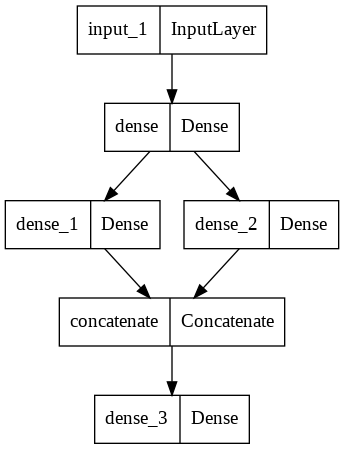

In [62]:
tf.keras.utils.plot_model(model_3)

Fit on training data:

In [63]:
hist_3 = model_3.fit(X_train, y_train,
            epochs = 50,
            validation_split = 0.2,
            verbose = 1,
            callbacks = my_callbacks)

Epoch 1/50
130/130 [==============================] - 1s 7ms/step - loss: 1154.5945 - mean_absolute_error: 7.4615 - val_loss: 9201.7227 - val_mean_absolute_error: 14.4772
Epoch 2/50
130/130 [==============================] - 1s 5ms/step - loss: 1876.8810 - mean_absolute_error: 7.5889 - val_loss: 1052.7122 - val_mean_absolute_error: 6.4742
Epoch 3/50
130/130 [==============================] - 1s 5ms/step - loss: 592.3823 - mean_absolute_error: 5.8709 - val_loss: 1377.6113 - val_mean_absolute_error: 6.9599
Epoch 4/50
130/130 [==============================] - 1s 5ms/step - loss: 886.1696 - mean_absolute_error: 6.3176 - val_loss: 2463.3191 - val_mean_absolute_error: 8.3996
Epoch 5/50
130/130 [==============================] - 1s 6ms/step - loss: 1311.8105 - mean_absolute_error: 6.5014 - val_loss: 1830.0225 - val_mean_absolute_error: 7.5478
Epoch 6/50
130/130 [==============================] - 1s 5ms/step - loss: 1314.3112 - mean_absolute_error: 6.8160 - val_loss: 6282.7578 - val_mean_abso

Plot curves:

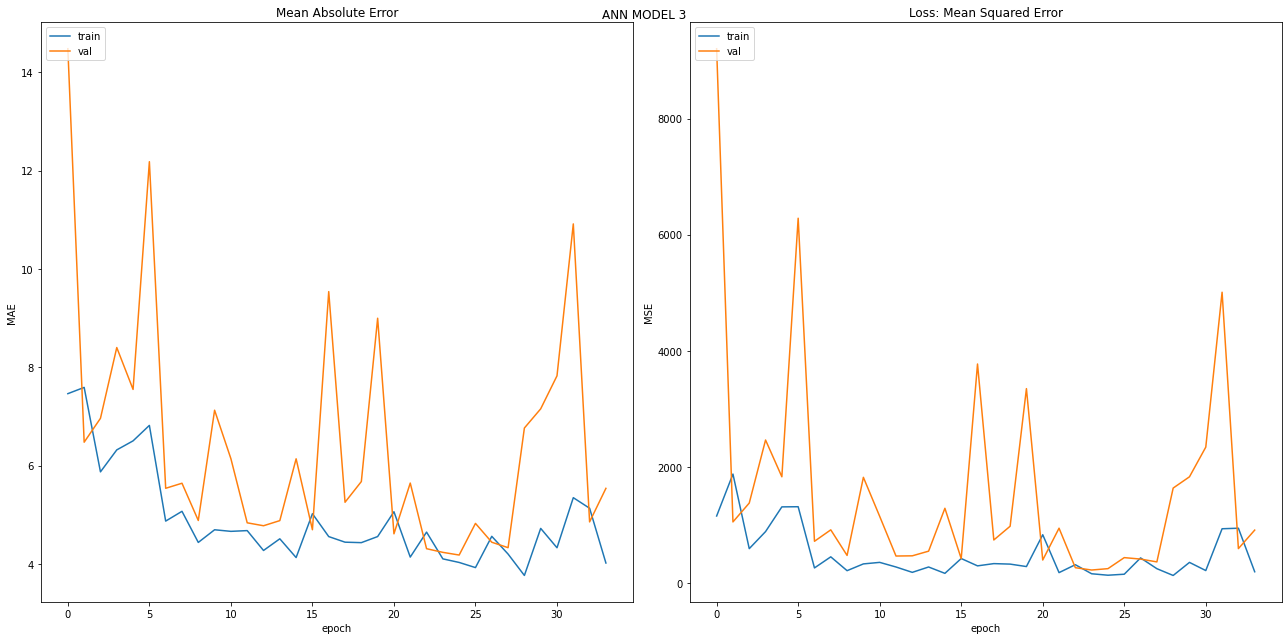

In [64]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,9))
  
fig.suptitle('ANN MODEL 3')

ax1.plot(hist_3.history['mean_absolute_error'])
ax1.plot(hist_3.history['val_mean_absolute_error'])
ax1.title.set_text('Mean Absolute Error')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')
#ax1.show()

ax2.plot(hist_3.history['loss'])
ax2.plot(hist_3.history['val_loss'])
ax2.title.set_text('Loss: Mean Squared Error')
ax2.set_ylabel('MSE')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')
#ax2.show()

Predict:

In [65]:
y_pred_ann_3 = model_3.predict(X_test)

Evaluate:

In [66]:
eval_ann_3 = evaluate(y_test, y_pred_ann_3.flatten(), "ANN_3")

MAE for ANN_3: 4.068396
MSE for ANN_3: 341.045597
R2  for ANN_3: 0.992033
Negative predictions:      0


Plot observed vs predicted:

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


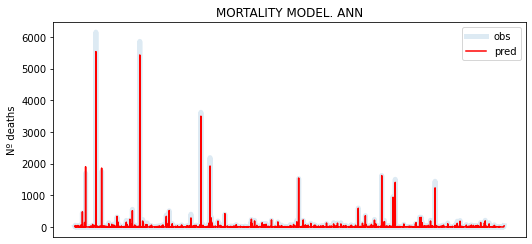

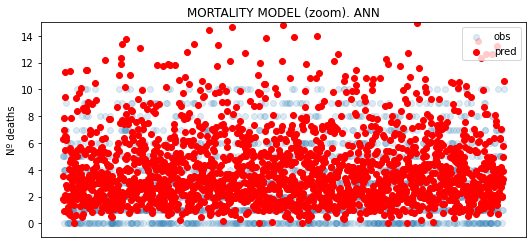

In [67]:
plotter(y_test, y_pred_ann_3, "ANN")

## Scalable Kernel Methods

### Kernel Ridge Regression + (RFF, Nyström) + GridSearchCV

These models completely fail.

In [68]:
import time
import warnings

import seaborn as sns; sns.set(style="ticks", color_codes=True)

from IPython.display import Markdown

from sklearn import svm
from sklearn import pipeline
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

In [69]:
def krr_rff_nys_gridsearch(train_predictors, train_observed, test_predictors, test_observed, feature,
                           n_components = [100], gamma = [1], cv_val = 2):
    """
    Function to apply approximate kernel ridge regression with RFF or Nyström approximation.
    GridSearchCV is used to find optimum parameters.
    
    Parameters
    ----------
    train_predictors : array-like
        Predictor variables for the given training data.
    train_observed : array-like
        Target variable observed for the given training data. Contonuous variable.
    test_predictor: array-like
        Predictor variables for the given test data.
    test_observed: array-like
        Target variable observed for the given test data. Continuous variable. 
    feature: string {'RFF' or 'Nystroem'}
        Feature map to approximate a kernel map using a subset os the training data.
    n_components: int
        Number of features to construct. How many data points will be used to construct
        the mapping. If none is give, 100 will be used.
    gamma: float
        Gamma parameter for the RBF, laplacian, polynomial, exponential chi2 and 
        sigmoid kernels. If none is given, 1 will be used.
    cv_val: int, cross-validation generator or an iterable
        Determines the cross-validation splitting startaefy. None as default
        
    Returns
    -------
    mae_error: float
        Mean absolute error regression loss.
    ellapsed_time: float
        Time needed to fit training data.
    grid_cv.best_params_: dict
        Parameter setting that gave the best result on the hold out data.
    """
    # Define feature map
    if feature == "Nystroem":
        feature_map = Nystroem()
    elif feature  == "RFF":
        feature_map = RBFSampler()
    else: # Raise exception if other features are desired
        raise Exception("No feature map is available for feature=" + feature +
                        ". Use feature=\"Nystroem\" or feature=\"RFF\"")
        
    if not(len(n_components) > 1 or len(gamma) > 1): # Raise warning
        warnings.warn("Kernel map approximation : " + feature.upper() +
                      ". No exhaustive search will be applied."
                      " At least one of the arguments \"n_components\", \"gamma\","
                      " must be a list of length > 1")
        
    approx_krr = pipeline.Pipeline([('feature_map', feature_map),
                                    ('ridge', LinearRegression())])
    
    parameters = {"feature_map__n_components" : n_components,
                  "feature_map__gamma" : gamma}
    
    t0 = time.time()
    grid_cv = GridSearchCV(approx_krr, 
                           param_grid = parameters, 
                           cv = cv_val, 
                           scoring = 'neg_mean_squared_error')
    grid_cv.fit(train_predictors, train_observed)
    ellapsed_time = time.time() - t0
  
    y_pred = grid_cv.predict(test_predictors)

    plotter(test_observed, y_pred, feature)
    
    mae_error = mae(test_observed, y_pred)
    print('MAE for %s with GridSearchCV: %.4f'% (feature, mae_error))

    mse_error = mse(test_observed, y_pred)
    print('MSE for %s with GridSearchCV: %.4f'% (feature, mse_error))

    r2_error = r2(test_observed, y_pred)
    print('R2 for %s with GridSearchCV: %.4f'% (feature, r2_error))
    
    return(mae_error, mse_error, r2, ellapsed_time, grid_cv.best_params_)
    

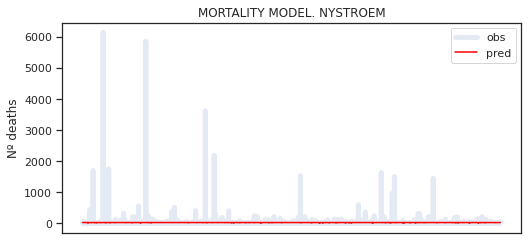

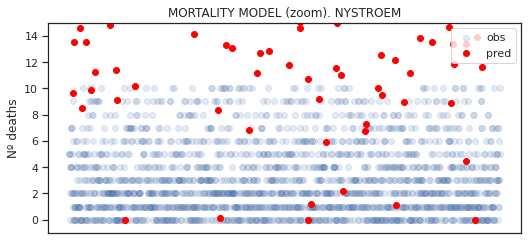

MAE for Nystroem with GridSearchCV: 32.4983
MSE for Nystroem with GridSearchCV: 42793.0193
R2 for Nystroem with GridSearchCV: 0.0003


In [70]:
nys_mae_cv, nys_mse_cv, nys_r2_cv, nys_time_cv, nys_best = krr_rff_nys_gridsearch(train_predictors = X_train,
                                                           train_observed = y_train,
                                                           test_predictors = X_test,
                                                           test_observed = y_test,
                                                           feature = "Nystroem",
                                                           n_components = [50,100,250,500,1000],
                                                           gamma = list(np.linspace(0,1,11)),
                                                           cv_val = 2)

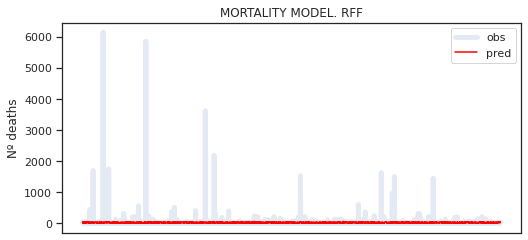

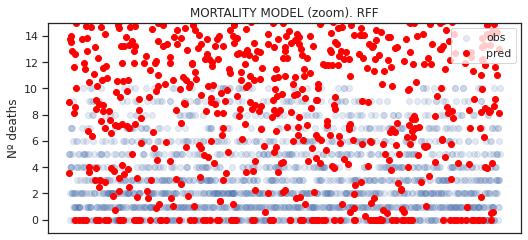

MAE for RFF with GridSearchCV: 33.9730
MSE for RFF with GridSearchCV: 42977.9813
R2 for RFF with GridSearchCV: -0.0040


In [71]:
rff_mae_cv, rff_mse_cv, rff_r2_cv, rff_time_cv, rff_best = krr_rff_nys_gridsearch(train_predictors = X_train,
                                                           train_observed = y_train,
                                                           test_predictors = X_test,
                                                           test_observed = y_test,
                                                           feature = "RFF",
                                                           n_components = [50,100,250,500,1000],
                                                           gamma = list(np.linspace(0,1,11)),
                                                           cv_val = 2)

## Random Forest

Load required libraires:

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

Search for best hyperparameters:

In [73]:
# Grid for hyperparameters
param_grid = ParameterGrid(
                {'n_estimators': [100, 125, 150, 200, 300, 500],
                 'max_features': [3, 5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20, 50]
                }
             )

# For loop to fit models with every combination of hyperparamaeters
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    
    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Results
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

Modelo: {'max_depth': None, 'max_features': 3, 'n_estimators': 100} ✓
Modelo: {'max_depth': None, 'max_features': 3, 'n_estimators': 125} ✓
Modelo: {'max_depth': None, 'max_features': 3, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 3, 'n_estimators': 200} ✓
Modelo: {'max_depth': None, 'max_features': 3, 'n_estimators': 300} ✓
Modelo: {'max_depth': None, 'max_features': 3, 'n_estimators': 500} ✓
Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 100} ✓
Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 125} ✓
Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 200} ✓
Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 300} ✓
Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 500} ✓
Modelo: {'max_depth': None, 'max_features': 7, 'n_estimators': 100} ✓
Modelo: {'max_depth': None, 'max_features': 7, 'n_estimators': 125} ✓
Modelo: {'max_depth'

,oob_r2,max_depth,max_features,n_estimators
60,0.976227,10.0,7.0,100.0
61,0.976118,10.0,7.0,125.0
84,0.975715,20.0,7.0,100.0
62,0.975492,10.0,7.0,150.0


In [74]:
# Best hyperparameters fot out-of-bag error
print("--------------------------------------------")
print("Mejores hiperparámetros encontrados (oob-r2)")
print("--------------------------------------------")
print(resultados.iloc[0,0], ":", resultados.iloc[0,:]['oob_r2'], "R2")

--------------------------------------------
Mejores hiperparámetros encontrados (oob-r2)
--------------------------------------------
0.9762265909592163 : 0.9762265909592163 R2


In [75]:
max_depth =  resultados.iloc[0]["max_depth"]
print("Max depth %f" % max_depth)

n_estimators =  resultados.iloc[0]["n_estimators"]
print("n_estimators %f" % n_estimators)

max_features = resultados.iloc[0]["max_features"]
print("max_features %f" % max_features)

Max depth 10.000000
n_estimators 100.000000
max_features 7.000000


Build up model:

In [76]:
modelo_rf = RandomForestRegressor(
            n_estimators = int(n_estimators),
            criterion    = 'squared_error',
            max_depth    = int(max_depth),
            max_features = int(max_features),
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

Fit on training data:

In [77]:
modelo_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=7, n_jobs=-1, random_state=123)

Predict:

In [78]:
pred_rf = modelo.predict(X = X_test)

Evaluate:

In [79]:
eval_rf = evaluate(y_test, pred_rf, "RANDOM FOREST")

MAE for RANDOM FOREST: 5.229953
MSE for RANDOM FOREST: 5900.550708
R2  for RANDOM FOREST: 0.862152
Negative predictions:      0


Plot observed vs predicted:

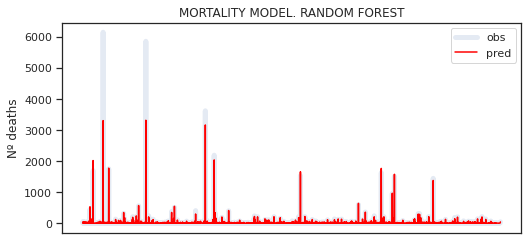

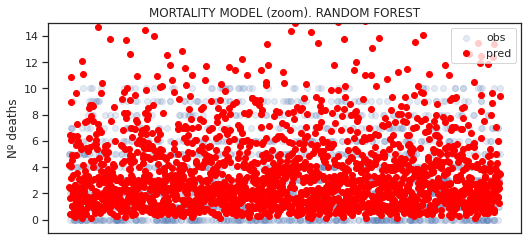

In [80]:
plotter(y_test, pred_rf, "RANDOM FOREST")

## Compare results:

In [81]:
data = [eval_lr,
        eval_knn,
        eval_ann_1,
        eval_ann_2,
        eval_ann_3,
        eval_rf]
df_results = pd.DataFrame(data, columns = ["MAE", "MSE", "R2"])
df_results["METHOD"] = ["LinearRegression", "KNN", "ANN1", "ANN2", "ANN3", "RandomForest"]
df_results.set_index("METHOD")

,MAE,MSE,R2
METHOD,,,
LinearRegression,3.420991,180.278695,0.995788
KNN,6.676887,4874.084119,0.886132
ANN1,4.615566,464.684748,0.989144
ANN2,3.897799,292.351415,0.993170
ANN3,4.068396,341.045597,0.992033
RandomForest,5.229953,5900.550708,0.862152
